In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [3]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

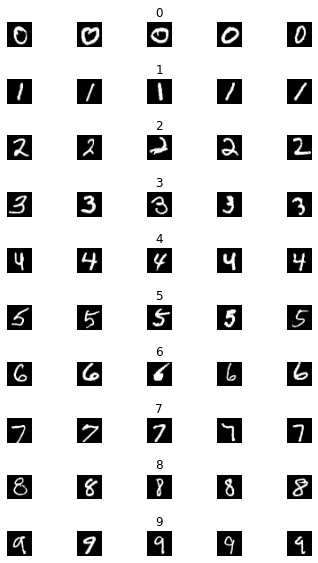

In [4]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


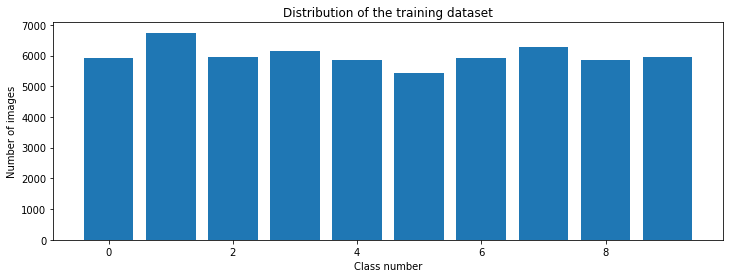

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [6]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
 
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


C:\Users\Ritesh\anaconda3\envs\Opencv\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.7898 - accuracy: 0.7453 - val_loss: 0.4223 - val_accuracy: 0.8792
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8787 - val_loss: 0.3405 - val_accuracy: 0.8975
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8884 - val_loss: 0.3107 - val_accuracy: 0.9058
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8919 - val_loss: 0.3324 - val_accuracy: 0.9015
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8939 - val_loss: 0.3153 - val_accuracy: 0.9050
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8952 - val_loss: 0.3174 - val_accuracy: 0.9068
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8967 - val_loss: 0.3034 - val_accuracy: 0.9095
E

Text(0.5, 0, 'epoch')

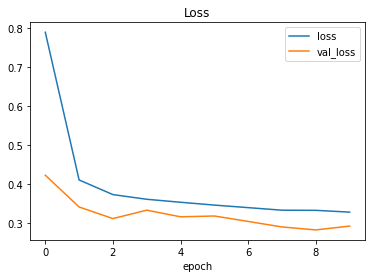

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

Text(0.5, 0, 'epoch')

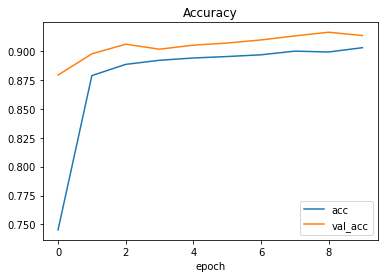

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3397684693336487
Test accuracy: 0.8988000154495239


In [10]:
import requests
from PIL import Image

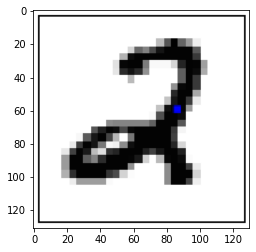

In [11]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [12]:
import cv2

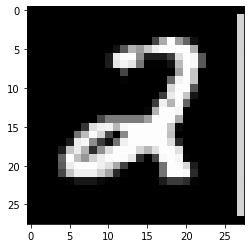

In [13]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 



In [14]:
img = img/255
img = img.reshape(1, 784)
 
prediction = np.argmax(model.predict(img), axis=-1)
print("predicted digit:", str(prediction))

predicted digit: [2]
